# Example: Kenalized Ridge Regression
------------------------------------------------------
*Machine Learning, 20121, Prof. Isabel Valera*

(Credits to Pablo M. Olmos from Universidad Carlos III de Madrid)

Here we show how to kernalized ridge regression. So far we applied basis  functions (e.g. a degree-5 polynomial) for non-linear regression with respect to the original data space, while remaining linear in the parameter space. Today, we kernalize ridge regression, or equivalently we make it a non-parametric method. In a nutshell, nonparametric models refer to such methods for which the complexity of the underlying model to perform the task (e.g. regression for us) **grows with the number of datapoints we use to train**.

Note that this is in contrast to the linear regression models we have seen before, for which we first had to decide the basis function (e.g. a degree-5 polynomial) and then train the model. However, the complexity of the model itself does not vary as we increase the number of points in the dataset. It is always a degree-5 polynomial. This **does not happen with nonparametric models**.




To open this notebook as slides, type in terminal:
`jupyter nbconvert KernalizedRegression.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True`

## Kernel Ridge Regression

Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^L$ and $y^{(i)}\in\mathbb{R}$. 

Imagine that each of the input vectors is transformed to include **additional features** (such as polynomial expansions or any other transformation). We denote the **feature vector** as

\begin{align}
\phi(\mathbf{x}): \mathbb{R}^d \rightarrow \mathbb{R}^D,
\end{align}

where $D\geq L$. Assume that the first element  of $\phi(\mathbf{x})$ is $1$, i.e. $\phi(\mathbf{x})_0=1$, accomodating for the intercept. We will use this training set to fit a model of the form

$$y \approx \theta_0 + \theta_1 \phi(\mathbf{x})_1 + \theta_2 \phi(\mathbf{x})_2 + \ldots + \theta_D \phi(\mathbf{x})_D $$


If we use the **ridge loss function**, i.e.

\begin{align}
L(\boldsymbol{\theta},\lambda) = \frac{1}{N} \left[\sum_{i=1}^{N} (y_{i}-\boldsymbol{\theta}^T\phi(\mathbf{x}_{i}))^2 + \lambda \sum_{j=1}^{D+1} \theta_j^2\right]
\end{align}

then we know that the minimum is attained at

$$\boldsymbol{\theta}_\lambda = (\mathbf{\Phi}^T\mathbf{\Phi} + \mathbf{D}_\lambda)^{-1}\mathbf{\Phi}^T\mathbf{y},$$

where $\mathbf{\Phi}$ is the $N\times (D+1)$ feature matrix and 

$$ \mathbf{D} = \left[ \begin{array}{cc} 0 & 0 \\ 0 & \lambda \mathbf{I}_{D\times D}\end{array}\right] $$

### Solution of Ridge Regression

Our whole derivation is based upon the following point. If we compute the gradient of $L(\boldsymbol{\theta},\lambda)$ w.r.t. $\boldsymbol{\theta}$ and set it to zero we get

\begin{align}
\boldsymbol{\theta}_\lambda = -\frac{1}{\lambda}\sum_{i=1}^N \left(y_{i}-\boldsymbol{\theta}_\lambda^T\phi(\mathbf{x}_{i})\right)\phi(\mathbf{x}_{i}) = \sum_{i=1}^{N} a_i \phi(\mathbf{x}_{i}) = \mathbf{\Phi}^T\mathbf{a},
\end{align}

where $a_i = -\frac{1}{\lambda} \left(y_{i}-\boldsymbol{\theta}_\lambda^T\phi(\mathbf{x}_{i})\right)$. Thus, the optimal solution belowns to the vector subpspace **spanned by the feature training vectors**. 


### The kernel-trick and the dual problem representation

Given $\mathbf{a}$, the regression estimate for a new vector $\mathbf{x}^{*}$ is:

\begin{align}
y^* \approx \boldsymbol{\theta}_\lambda^T \phi(\mathbf{x}^*) &= \left(\mathbf{\Phi}^T\mathbf{a}\right)^T \phi(\mathbf{x}^*) = \left(\sum_{i=1}^{N} a_i \phi(\mathbf{x}_{i})\right)^T \phi(\mathbf{x}^*) = \sum_{i=1}^{N} a_i \phi(\mathbf{x}_{i})^T \phi(\mathbf{x}^*) \\ &= \sum_{i=1}^{N} a_{i} <\phi(\mathbf{x}_{i}), \phi(\mathbf{x}^*)>=\sum_{i=1}^{N} a_{i}  k(\mathbf{x}_{i},\mathbf{x}^*) = \mathbf{a}^T \mathbf{k}(\mathbf{x}^*), 
\end{align}
where

\begin{align}
\mathbf{k}(\mathbf{x}^*) = \left[\begin{array}{c} k(\mathbf{x}_{1},\mathbf{x}^*) \\ k(\mathbf{x}_{2},\mathbf{x}^*) \\ \vdots \\ k(\mathbf{x}_{N},\mathbf{x}^*)\end{array}\right] = \left[\begin{array}{c} \phi(\mathbf{x}_{1})^T \phi(\mathbf{x}^*) \\ \phi(\mathbf{x}_{2})^T \phi(\mathbf{x}^*) \\ \vdots \\ \phi(\mathbf{x}_{N})^T \phi(\mathbf{x}^*)\end{array}\right] 
\end{align}

and $k(\mathbf{x}_{i},\mathbf{x}^*)$ is called the **kernel function** between points $\mathbf{x}_{i}$ and $\mathbf{x}^{*}$. In **kernel linear regression**, we will choose a kernel function as **similarity metric** between each pair points and **our goal is to find the vector $\mathbf{a}$ that minimizes the ridge loss function**:

\begin{align}
y^* \approx \sum_{i=1}^{N} a^i k(\mathbf{x}^{(i)},\mathbf{x}^*)
\end{align}

### Examples of kernel functions 

In order to explot the kernel trick, we need to be able to construct valid kernel functions. One approach is to choose directly a feature space mapping $\phi(\mathbf{x})$. For instance, if $x\in\mathbb{R}$ we can choose 
\begin{align}
\phi(x) =[1, x, ~ x^2] \Rightarrow  k(x_{1},x_{2}) = 1+ (x_{1}x_{2}) + (x_{1}x_{2})^2
\end{align}

The most common approach is to **choose the kernel directly**. In this case we must ensure that the function we choose **corresponds to a scalar product in some (perhaps infinite dimensional) feature space** (technicaly, that [Mercer's theorem](http://people.cs.uchicago.edu/~niyogi/papersps/MinNiyYao06.pdf) is satisfied).

Check this [**link**](http://scikit-learn.org/stable/modules/metrics.html) to see possibles examples of kernels that can be used within sklearn. A very common one that actually maps over an **infinite dimensional feature space** is the radial basis function (RBF) or Gaussian kernel:

\begin{align}
k(\mathbf{x},\mathbf{x}^*) = \text{e}^ -\frac{||\mathbf{x}-\mathbf{x}^*||^2}{2\sigma^2},
\end{align}

where $sigma$ is called the bandwith and it is a parameter that typically has to be adjusted by **cross validation**.

**You can understand the kernel as a similarity metric so that the vectors closest to $\mathbf{x}^*$ in the training set are those that weight more in the prediction!**

---

### Finding the vector of coefficients $\mathbf{a}$

If we substitute $\mathbf{\theta} = \mathbf{\Phi}^T\mathbf{a}$ in the Ridge Loss function we get the dual optimization problem. After some manipulation, the loss function is expressed in the following way:

\begin{align}
L(\boldsymbol{a},\lambda) = \frac{1}{N}\left[\mathbf{a}^T \mathbf{K}^T\mathbf{K}\mathbf{a}-\mathbf{a}^T\mathbf{K}\mathbf{y}+\lambda\mathbf{a}^T\mathbf{K}\mathbf{a}\right],
\end{align}
where $\mathbf{K}$ is the $(N\times N)$ symmetric **kernel (Gram) matrix** such that

\begin{align}
K_{nm} = k(\mathbf{x}_{m},\mathbf{x}_{n}).
\end{align}

$L(\boldsymbol{a},\lambda)$ is a convex function whose minimum is attained at

\begin{align}
\boldsymbol{a} = \left(\boldsymbol{K}+\lambda \boldsymbol{I}\right)^{-1} \boldsymbol{y}.
\end{align}

As you probably guess already, this solution is rather optimized by **gradient descent** due to better complexity and numerical stability. Also, note that the complexity now increases as $\mathcal{O}(N^3)$ instead of the $\mathcal{O}(D^3)$ complexity that we had in the feature primal space. 



### Example of using kernel ridge linear regression (KRR) for the example above 

We use [**sklearn implementation of KRR**](http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge)

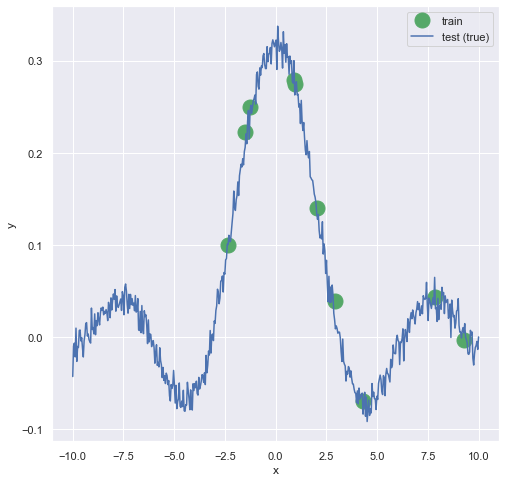

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.kernel_ridge import KernelRidge

%matplotlib inline

# use seaborn plotting defaults
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [8,8]

np.random.seed(0)

N_train = 10
R = 10
Xtrain = np.sort(np.random.uniform(-R,R,N_train), axis=0)       #Training points

Xtest = np.linspace(-R,R,500)      #Test points

def noise_sinc(X):
    Y = np.sin(X)/np.pi/(X+1e-6) + np.sqrt(1e-04) * np.random.randn(X.shape[0])
    return Y

Ytrain = noise_sinc(Xtrain)
Ytest = noise_sinc(Xtest)

plt.plot(Xtrain,Ytrain,'go',ms=15,label='train')
plt.plot(Xtest,Ytest,'b-',label='test (true)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [8]:
#K-Ridge regression training
clf = KernelRidge(gamma=1,kernel='rbf')   #gamma is the inverse of the bandwith

Ypred = clf.fit(Xtrain.reshape([-1,1]), Ytrain.reshape([-1,1])).predict(Xtest.reshape([-1,1]))   #Function .fit does not work with a-dimensional vectors



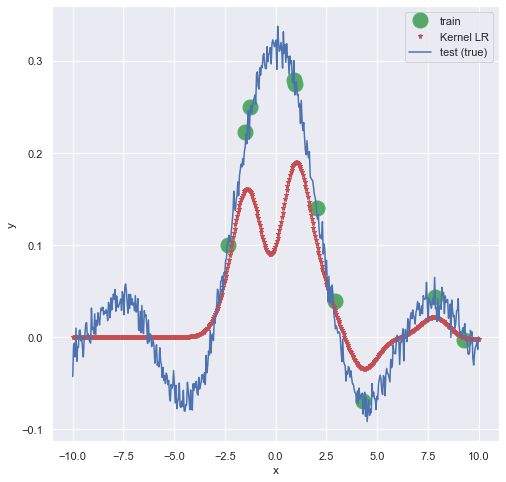

In [9]:
plt.plot(Xtrain,Ytrain,'go',ms=15,label='train')
plt.plot(Xtest,Ypred,'r*',ms=5,label='Kernel LR')
plt.plot(Xtest,Ytest,'b-',label='test (true)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Exercise 

Investigate how does the kernel regressor behave as you vary the number of training points and the bandwith in the RBF kernel. How do you identify that the model is overfitting? or if the model is too biased? how do you regularize?

Investigate also the effect of varying the kernel.